In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Optional: Ignore warnings to keep the notebook clean
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('advertising.csv')

# Drop 'Unnamed: 0' if it exists (common artifact in this dataset)
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Show basic info
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


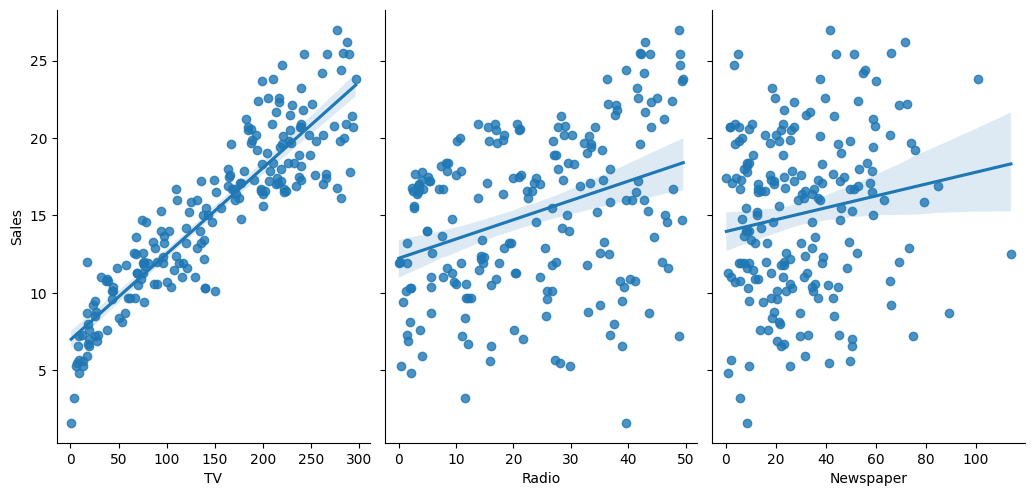

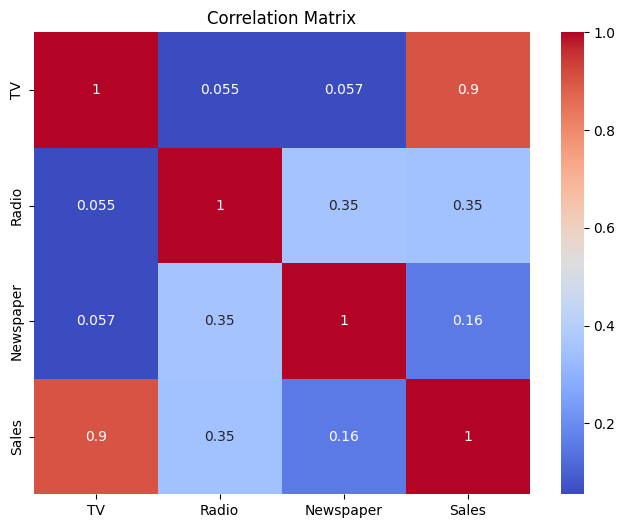

In [3]:
# 1. Visualize relationship between each Ad channel and Sales
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.7, kind='reg')
plt.show()

# 2. Check Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [4]:
# Features (X) = Ad Spend
# Target (y) = Sales
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 160
Testing samples: 40


In [5]:
# Initialize and Train
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on Test data
y_pred = model.predict(X_test)

# Calculate Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R2 Score (Accuracy): {r2:.2f}")
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

Root Mean Squared Error (RMSE): 1.71
R2 Score (Accuracy): 0.91

Model Coefficients:
TV: 0.0545
Radio: 0.1009
Newspaper: 0.0043


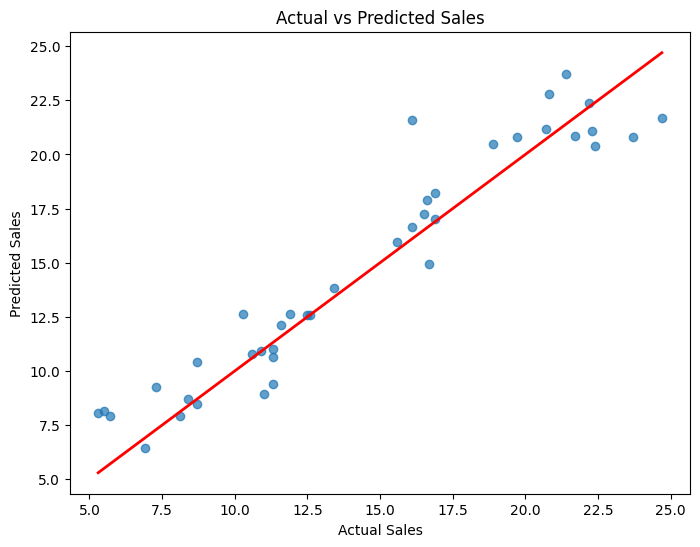

In [6]:
# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [7]:
joblib.dump(model, 'sales_model.pkl')
print("✅ Model saved successfully as 'sales_model.pkl'")

✅ Model saved successfully as 'sales_model.pkl'
